#**DBSCAN(Density Based Spatial Clustering of Applications With Noise:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("/content/Clustering_gmm.csv")

In [3]:
df2=pd.read_csv("/content/Mall_Customers.csv")

In [4]:
#shape of the dataset1
df1.shape

(500, 2)

In [5]:
#shape of the dataset 2
df2.shape

(200, 5)

In [6]:
#sample rows from df1
df1.head(5)

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [7]:
#sample rows from df2
df2.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


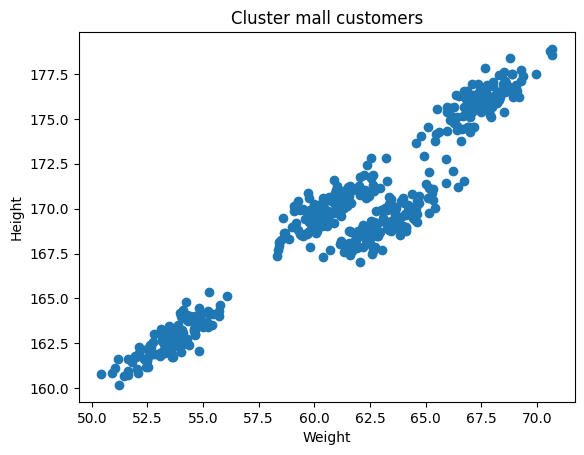

In [8]:
#plotting the dataset1
plt.scatter(df1["Weight"],df1["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Cluster mall customers")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


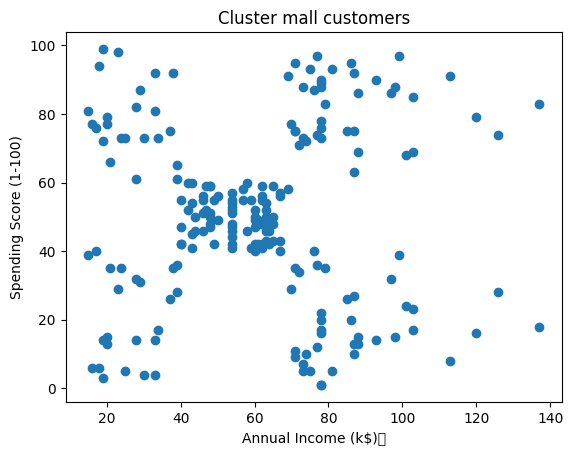

In [9]:
##plotting the dataset1
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)	")
plt.ylabel("Spending Score (1-100)")
plt.title("Cluster mall customers")
plt.show()

#Clustering using the K-Means Clustering on dataset1

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss=[]
k=-1
max_score=float("-inf")
for i in range(2,15,1):
  km=KMeans(n_clusters=i,max_iter=300)
  labels=km.fit_predict(df1)
  wcss.append(km.inertia_)
  score=silhouette_score(df1,labels)
  if(score>max_score):
    max_score=score
    k=i

In [11]:
print("maximum silhoutte score: ",max_score)
print("better k value: ",k)

maximum silhoutte score:  0.731991324095665
better k value:  3


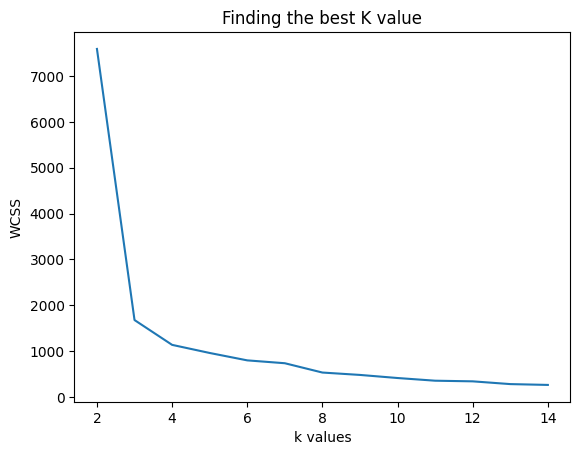

In [12]:
#using the plot between k and the wcss to find the optimal k value
plt.plot(range(2,15,1),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.title("Finding the best K value")
plt.show()

In [13]:
#using k=3 to cluster the data
km=KMeans(n_clusters=3,max_iter=300)
labels=km.fit_predict(df1)

In [14]:
df1["label"]=labels

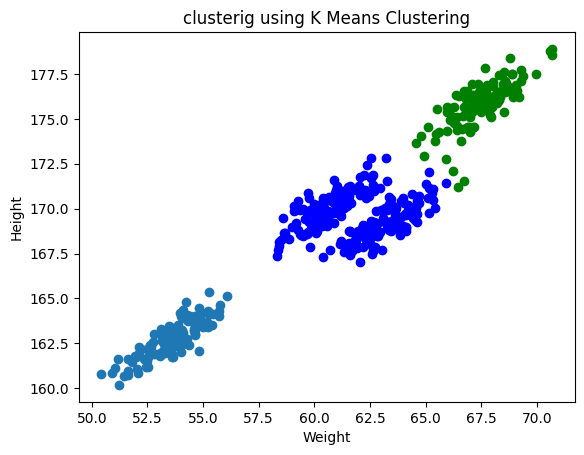

In [15]:
#plotting the data and clusters
plt.scatter(df1.iloc[0:,0][df1["label"]==0],df1.iloc[0:,1][df1["label"]==0],color="green")
plt.scatter(df1.iloc[0:,0][df1["label"]==1],df1.iloc[0:,1][df1["label"]==1],color="blue")
plt.scatter(df1.iloc[0:,0][df1["label"]==2],df1.iloc[0:,1][df1["label"]==2])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("clusterig using K Means Clustering")
plt.show()

#Clustering using the K-Means Clustering on dataset2

In [16]:
X=df2[["Annual Income (k$)","Spending Score (1-100)"]]

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss=[]
k=-1
max_score=float("-inf")
for i in range(2,15,1):
  km=KMeans(n_clusters=i,max_iter=300)
  labels=km.fit_predict(X)
  wcss.append(km.inertia_)
  score=silhouette_score(X,labels)
  if(score>max_score):
    max_score=score
    k=i

In [18]:
print("maximum silhoutte score: ",max_score)
print("better k value: ",k)

maximum silhoutte score:  0.553931997444648
better k value:  5


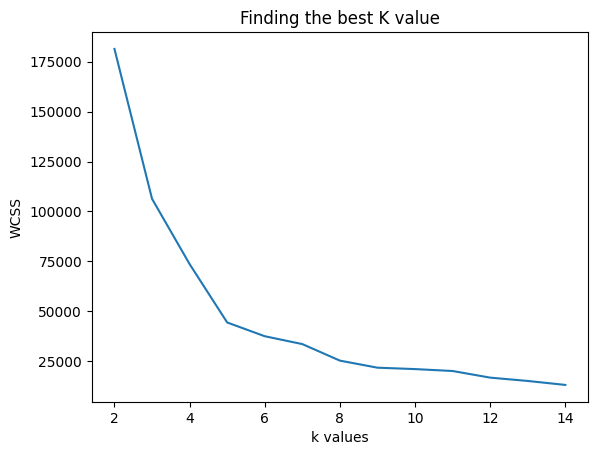

In [19]:
#using the plot between k and the wcss to find the optimal k value
plt.plot(range(2,15,1),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.title("Finding the best K value")
plt.show()

In [20]:
#using k=2 to cluster the data
km=KMeans(n_clusters=2,max_iter=300)
labels=km.fit_predict(X)

In [21]:
X["label"]=labels

/tmp/ipython-input-2512157090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["label"]=labels


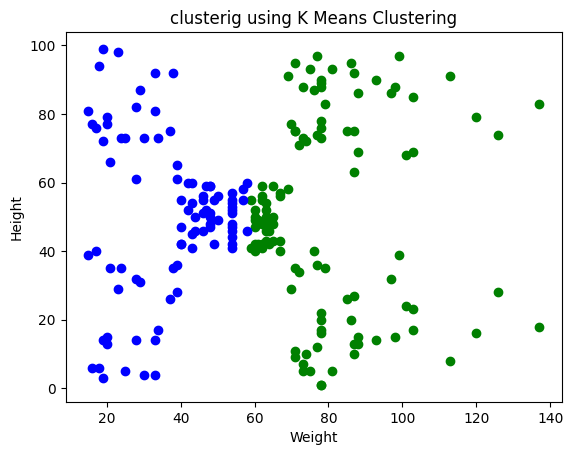

In [22]:
#plotting the data and clusters
plt.scatter(X.iloc[0:,0][X["label"]==0],X.iloc[0:,1][X["label"]==0],color="green")
plt.scatter(X.iloc[0:,0][X["label"]==1],X.iloc[0:,1][X["label"]==1],color="blue")
plt.scatter(X.iloc[0:,0][X["label"]==2],X.iloc[0:,1][X["label"]==2])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("clusterig using K Means Clustering")
plt.show()

#Clustering using the Hierarchical Clustering on dataset1

In [23]:
df1[["Weight","Height"]]

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


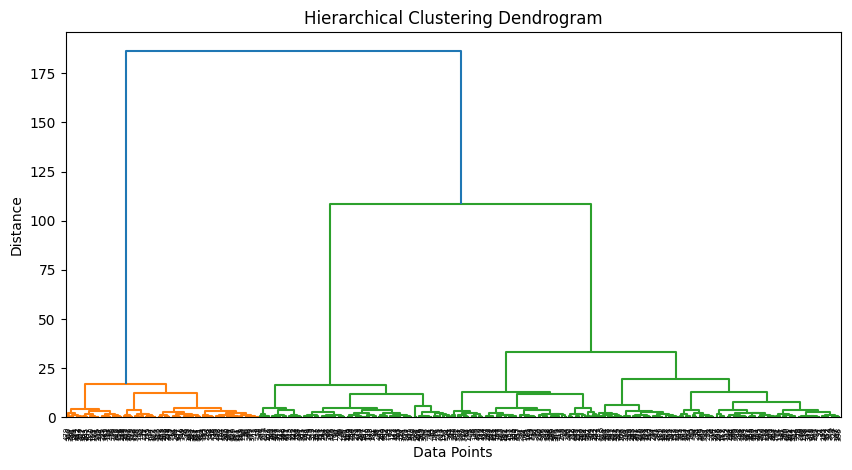

In [24]:
#drawing the dendrogram
from scipy.cluster.hierarchy import linkage,dendrogram
Z=linkage(df1[["Weight","Height"]],method="ward",metric="euclidean")
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(linkage="ward",n_clusters=3)
labels=agg.fit_predict(df1[["Weight","Height"]])

In [26]:
df1["agglabel"]=labels

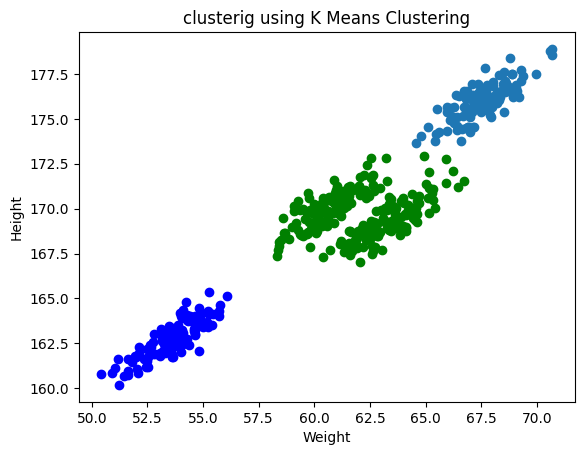

In [27]:
#plotting the data and clusters
plt.scatter(df1.iloc[0:,0][df1["agglabel"]==0],df1.iloc[0:,1][df1["agglabel"]==0],color="green")
plt.scatter(df1.iloc[0:,0][df1["agglabel"]==1],df1.iloc[0:,1][df1["agglabel"]==1],color="blue")
plt.scatter(df1.iloc[0:,0][df1["agglabel"]==2],df1.iloc[0:,1][df1["agglabel"]==2])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("clusterig using K Means Clustering")
plt.show()

#Clustering using the Hierarchical Clustering on dataset2

In [28]:
X=df2[["Annual Income (k$)","Spending Score (1-100)"]]

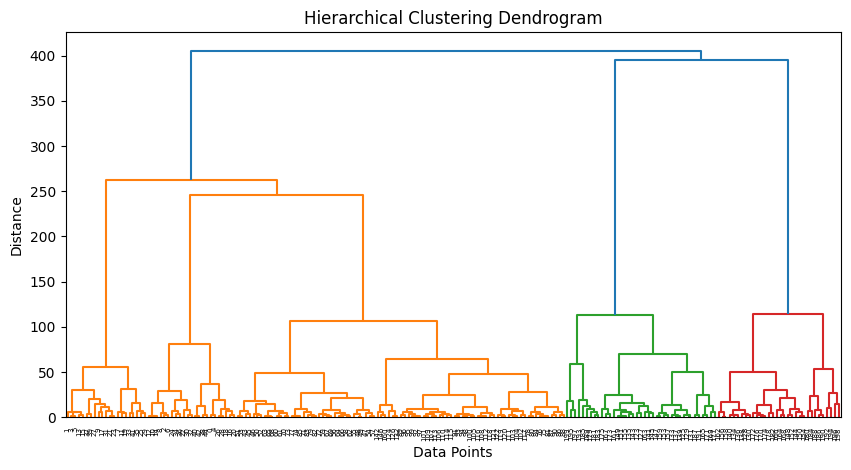

In [29]:
#drawing the dendrogram
from scipy.cluster.hierarchy import linkage,dendrogram
Z=linkage(X,method="ward",metric="euclidean")
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(linkage="ward",n_clusters=2)
labels=agg.fit_predict(X)

In [31]:
X["agglabel"]=labels

/tmp/ipython-input-3305865630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["agglabel"]=labels


In [32]:
X

,Annual Income (k$),Spending Score (1-100),agglabel
0,15,39,1
1,15,81,1
2,16,6,1
3,16,77,1
4,17,40,1
...,...,...,...
195,120,79,0
196,126,28,0
197,126,74,0
198,137,18,0


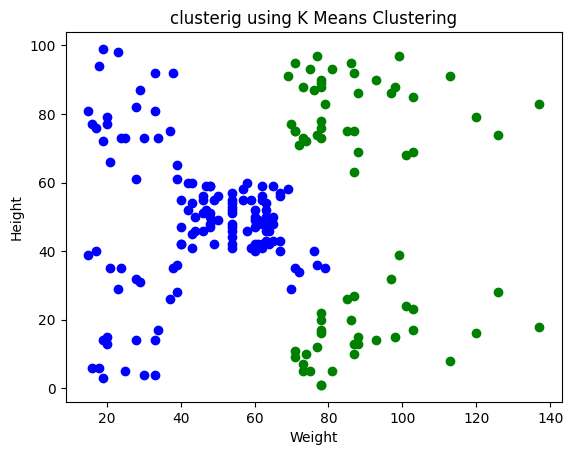

In [33]:
#plotting the data and clusters
plt.scatter(X.iloc[0:,0][X["agglabel"]==0],X.iloc[0:,1][X["agglabel"]==0],color="green")
plt.scatter(X.iloc[0:,0][X["agglabel"]==1],X.iloc[0:,1][X["agglabel"]==1],color="blue")
plt.scatter(X.iloc[0:,0][X["agglabel"]==2],X.iloc[0:,1][X["agglabel"]==2])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("clusterig using K Means Clustering")
plt.show()

#Clustering using the DBSCAN Clustering on dataset1

In [34]:
X=df1[["Weight","Height"]]

In [35]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=1,min_samples=8)
labels=db.fit_predict(X)

In [36]:
X["label"]=labels

/tmp/ipython-input-2512157090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["label"]=labels


In [37]:
X["label"].value_counts()

,count
label,
1,249
2,125
0,122
-1,4


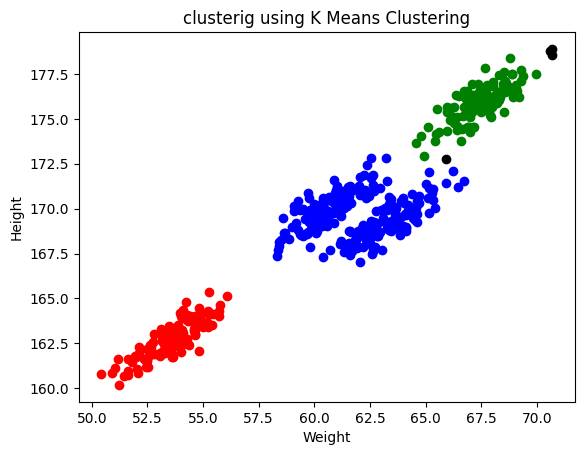

In [38]:
#plotting the data and clusters
plt.scatter(X.iloc[0:,0][X["label"]==0],X.iloc[0:,1][X["label"]==0],color="green")
plt.scatter(X.iloc[0:,0][X["label"]==1],X.iloc[0:,1][X["label"]==1],color="blue")
plt.scatter(X.iloc[0:,0][X["label"]==2],X.iloc[0:,1][X["label"]==2],color="red")
plt.scatter(X.iloc[0:,0][X["label"]==-1],X.iloc[0:,1][X["label"]==-1],color="black")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("clusterig using K Means Clustering")
plt.show()

#CUSTOM DBSCAN CLASS

## DBSCAN Algorithm

This explanation details the step-by-step logic of the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm implementation.

---

### 1. Initialization Phase

The algorithm begins by setting up the necessary structures for tracking data point status and distances.

* **`labels` Array:** An array initialized with **-2** (our temporary code for 'unvisited'). We reserve **-1** for 'Noise' and **0, 1, 2, ...** for specific cluster IDs.
* **`dist_matrix`:** The **Euclidean distance** is pre-calculated between every pair of points. This pre-computation makes the `get_neighbors` function (which is called repeatedly) very fast, leveraging NumPy's **vectorization**.
* **`current_cluster_id`:** Initialized to **0**, this counter assigns a unique ID to each new cluster discovered.

---

### 2. Core Loop and Point Classification 🔍

The algorithm iterates through every data point ($i$) to check its density and initiate clusters.

#### **A. Outer Loop (`for i in range(num_samples)`)**

* **Visited Check:** The algorithm only acts on points marked as **unvisited (-2)**. If a point has a label $\neq -2$, it belongs to a cluster or has already been identified as temporary noise.

#### **B. Core Point Check**

1.  **Neighbor Search:** `neighbors = get_neighbors(i)` finds all points within the radius $\epsilon$ of point $i$.
2.  **Density Test:**
    * If `len(neighbors) < MinPts`, the point is not dense enough. It is tentatively marked as **Noise (-1)** and the loop moves to the next point.
    * If `len(neighbors) >= MinPts`, the point $i$ is a **Core Point**. A new cluster is started, and $i$ is assigned the `current_cluster_id`.

---

### 3. Cluster Expansion (BFS) 🔗

Once a **Core Point** is identified, the algorithm uses a **Breadth-First Search (BFS)** approach (via a `deque` or queue $S$) to implement the concepts of **Density Reachability** and **Density Connectivity**.

* The queue $S$ is initialized with the neighbors of the initial Core Point.
* The `while S` loop processes points $q$ from the queue:

1.  **Border Point Re-labeling:** If $q$ was previously marked as **Noise (-1)**, it means a dense region (the current cluster) has reached it. $q$ is now re-labeled as a **Border Point** belonging to the `current_cluster_id`.
2.  **Unvisited Labeling:** If $q$ was **unvisited (-2)**, it is marked with the `current_cluster_id`.
3. ### Expansion Check

If $q$ itself is found to be a **Core Point** (i.e., it has **>= MinPts** neighbors), all its **unvisited (-2)** or **Noise (-1) neighbors** are added to the queue $S$ for further expansion. This ensures the entire contiguous high-density region is captured.

---

### 4. Termination

* The expansion stops when $S$ is empty.
* The `current_cluster_id` is incremented, and the outer loop searches for the next unvisited point.
* When the outer loop finishes, all points have been visited:
    * Points with `labels >= 0` belong to their respective clusters.
    * Points remaining with `labels = -1` are the final **Noise Points** (Outliers).

In [79]:
from collections import deque
class DBSCAN:
  def __init__(self,eps,min_samples):
    self.eps=eps
    self.min_samples=min_samples

  def get_euclidean_distance(self,point1,point2):

    return np.sqrt(np.sum((point1-point2)**2))

  def get_neighbors(self,point,distance_matrix):
    return (np.where(distance_matrix[point]<=self.eps))[0]

  def fit_predict(self,X):
    n_samples=X.shape[0]
    n_features=X.shape[1]
    labels=[-2 for i in range(n_samples)]
    current_cluster_id = 0

    #precomputing the distance matrix

    distance_matrix=np.zeros((n_samples,n_samples))
    for i in range(n_samples):
      for j in range(i+1,n_samples):
        distance=self.get_euclidean_distance(X.iloc[i],X.iloc[j])

        distance_matrix[i][j]=distance
        distance_matrix[j][i]=distance

    for i in range(0,n_samples):
      if labels[i] != -2:
        continue
      #Finds all points within epsilon distance of point i.
      neighbors=self.get_neighbors(i,distance_matrix)
      if(len(neighbors)<self.min_samples):
        labels[i]=-1 # Mark as Noise
        continue
      # Core Point: Start a new cluster
      labels[i] = current_cluster_id
      S = deque(neighbors)
      while(S):
        q = S.popleft()
        if labels[q] == current_cluster_id:
          continue
        if(labels[q]==-1):
          labels[q] = current_cluster_id # Reclassify Border Point
          continue
        labels[q] = current_cluster_id
        neighbors_q = self.get_neighbors(q,distance_matrix)
        if len(neighbors_q) >= self.min_samples:
          # Add unvisited or noise points for expansion
          for r in neighbors_q:
              if labels[r] == -2 or labels[r] == -1:
                  S.append(r)
      current_cluster_id += 1
    return labels

In [80]:
db=DBSCAN(eps=1,min_samples=8)
labels=db.fit_predict(X)

In [83]:
X["custom_label"]=labels

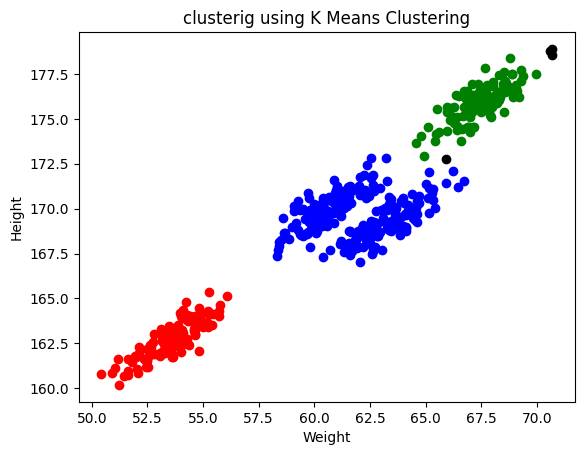

In [84]:
#plotting the data and clusters
plt.scatter(X.iloc[0:,0][X["custom_label"]==0],X.iloc[0:,1][X["custom_label"]==0],color="green")
plt.scatter(X.iloc[0:,0][X["custom_label"]==1],X.iloc[0:,1][X["custom_label"]==1],color="blue")
plt.scatter(X.iloc[0:,0][X["custom_label"]==2],X.iloc[0:,1][X["custom_label"]==2],color="red")
plt.scatter(X.iloc[0:,0][X["custom_label"]==-1],X.iloc[0:,1][X["custom_label"]==-1],color="black")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("clusterig using K Means Clustering")
plt.show()